### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

In [2]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

$H_{0}: \mu_{height} = 67.6~in$ <br/>
$H_{1}: \mu_{height} \neq 67.6~in$

`2.` What is the population mean height?  What is the standard deviation of the population heights?  Create a sample set of data using the code below.  What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  What is the standard deviation of the sampling distribution of the mean of five draws? Use **quiz 2** below to assure your answers are correct.  

In [3]:
# The population mean and standard deviation height
full_data.height.mean(), np.std(full_data.height)

(67.59748697307937, 3.1189087116821472)

In [4]:
sample_data = full_data.sample(5)
np.mean(sample_data.height)

67.88234252049084

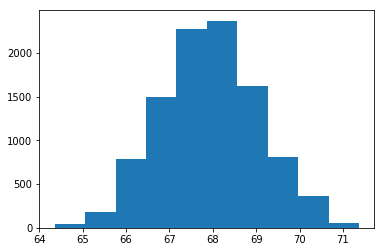

In [5]:
means_five = []
for _ in range(10000):
    boots_sample = sample_data.sample(5, replace=True)
    mean_five = boots_sample.height.mean()
    means_five.append(mean_five)
plt.hist(means_five);

In [6]:
np.std(means_five)

1.141357351999374

`3.` Using the null and alternative set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

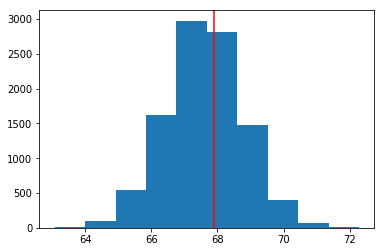

In [7]:
null_mean = 67.6
null_vals = np.random.normal(null_mean, np.std(means_five), 10000)
plt.hist(null_vals)

# where our sample mean falls on null distribution
plt.axvline(x=sample_data.height.mean(), color='r');

In [8]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample_data.height.mean()

prob_more_extreme_high = (null_vals > obs_mean).mean()
prob_more_extreme_low = (null_vals < null_mean - (obs_mean - null_mean)).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.8049999999999999

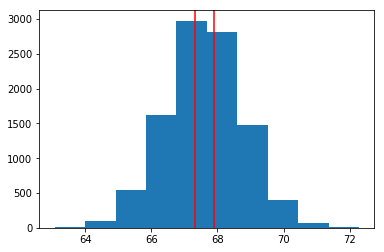

In [9]:
# let's see where our sample mean falls on the null distribution
lower_bound = null_mean - (obs_mean - null_mean)
upper_bound = obs_mean

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red')
plt.axvline(x=upper_bound, color = 'red');

`4.` Now, imagine you received the same sample mean you calculated from the sample in question 2 above, but with a sample of 1000.  What would the new standard deviation be for your sampling distribution for the mean of 1000 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from the quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [11]:
sample_data_300 = full_data.sample(300)
means_300 = []
for _ in range(300):
    boots_sample = sample_data_300.sample(300, replace=True)
    mean_300 = boots_sample.height.mean()
    means_300.append(mean_300)
np.std(means_300)

0.17439935714311713

In [12]:
sample_data_1000 = full_data.sample(1000)
means_1000 = []
for _ in range(1000):
    boots_sample = sample_data_1000.sample(1000, replace=True)
    mean_1000 = boots_sample.height.mean()
    means_1000.append(mean_1000)

In [13]:
np.std(means_1000)

0.0986486959387029

In [14]:
null_vals = np.random.normal(null_mean, np.std(means_1000), 1000)

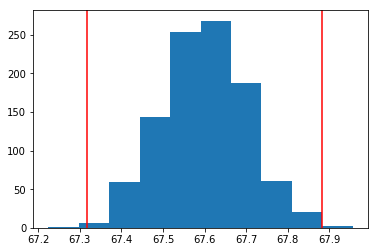

In [15]:
plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red')
plt.axvline(x=upper_bound, color = 'red');

In [16]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

prob_more_extreme_low = (null_vals < lower_bound).mean()
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.005

`5.` Reflect on what happened by answering the final quiz in this concept.

Even the smallest of differences between a sample mean and a hypothesized population mean are significant when we have large sample sizes.